### Load Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
df = pd.read_csv('databreastcancer_baru.csv', sep=';')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Preprocessing Label Target

In [23]:
# Ubah label M dan B menjadi 0 dan 1
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

drop kolom id

In [11]:
df = df.drop('id', axis=1)

KeyError: "['id'] not found in axis"

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### EDA

Pemeriksaan Jumlah Data & Distribusi Target

Jumlah baris dan kolom: (569, 32)

Jumlah data tiap kelas:
1    357
0    212
Name: diagnosis, dtype: int64


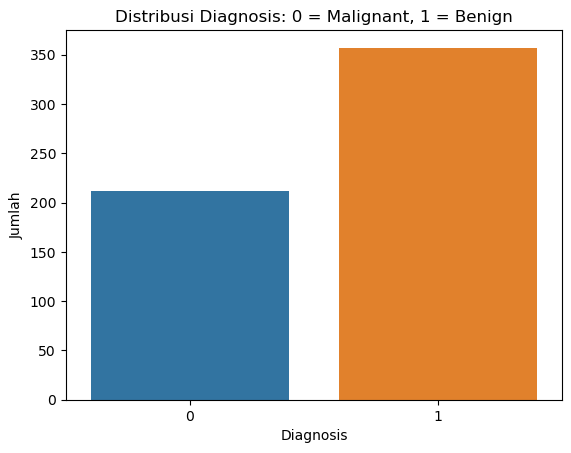

In [24]:
print("Jumlah baris dan kolom:", df.shape)
print("\nJumlah data tiap kelas:")
print(df['diagnosis'].value_counts())

# Visualisasi distribusi target
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis: 0 = Malignant, 1 = Benign')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

Heatmap Korelasi Antar Fitur

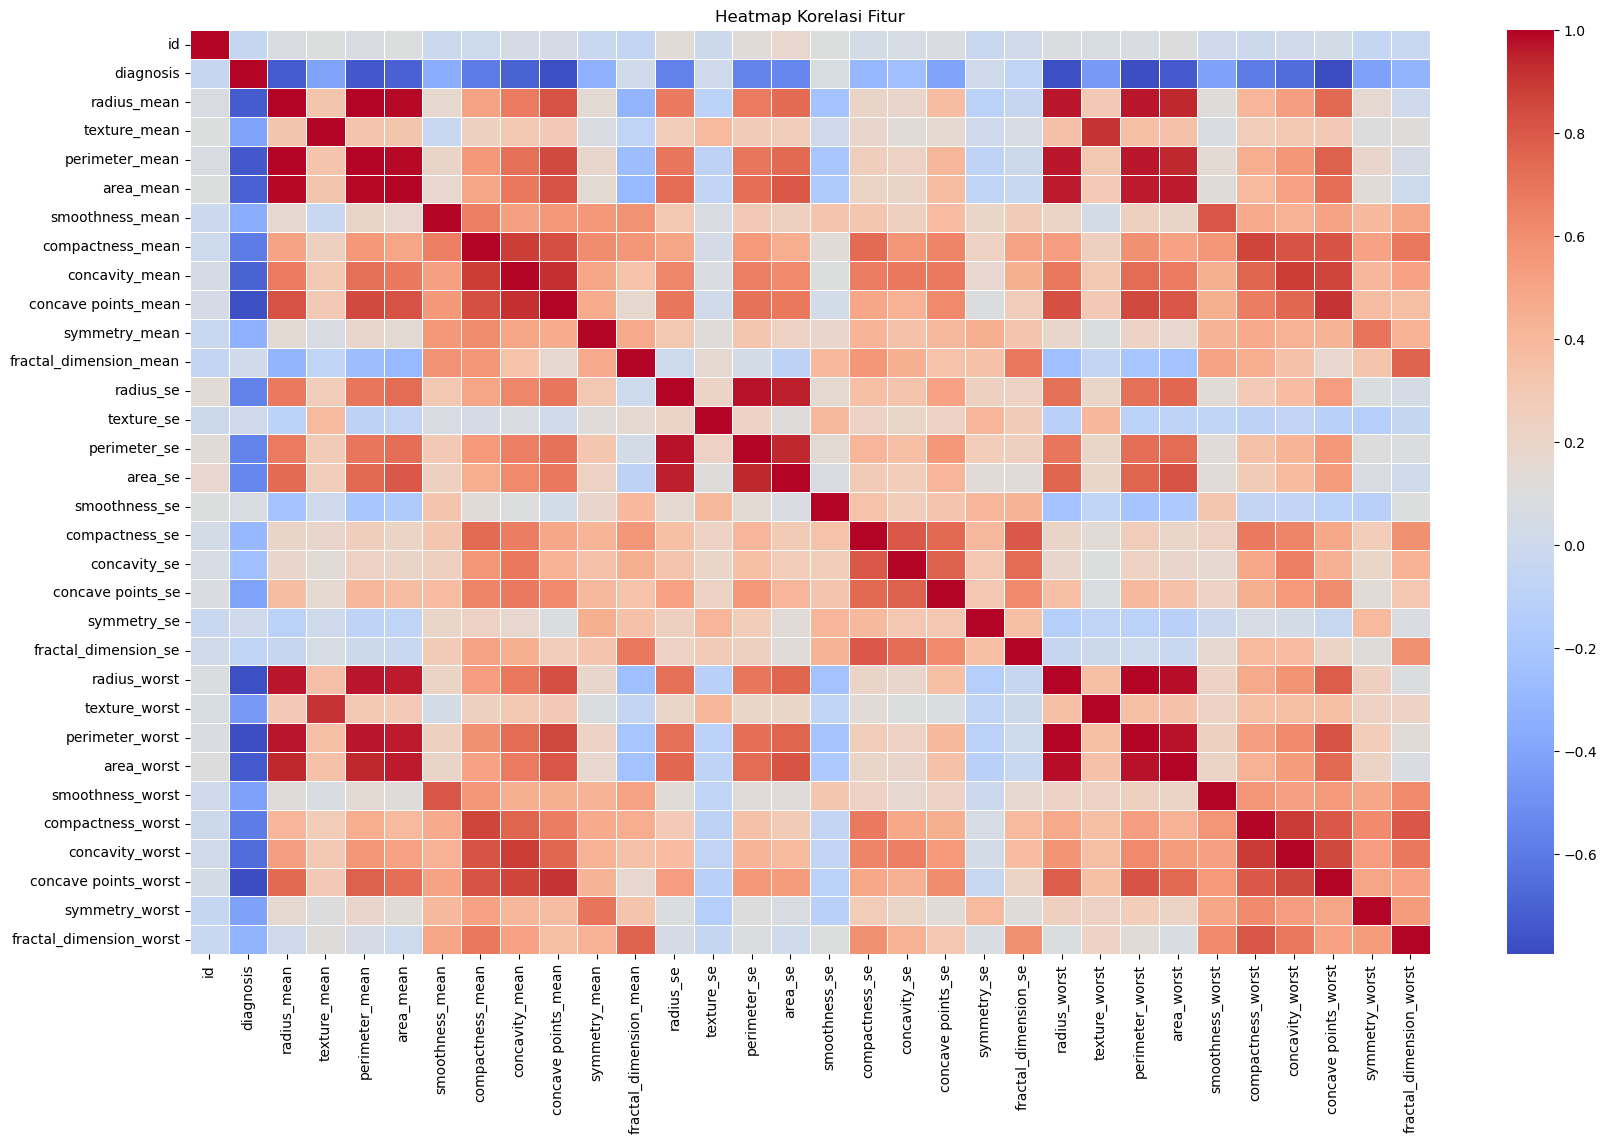

In [25]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [26]:
df.corr()['diagnosis'].abs().sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

Boxplot Fitur Penting

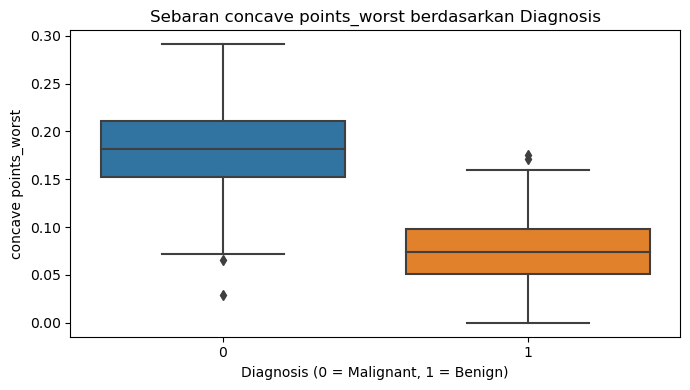

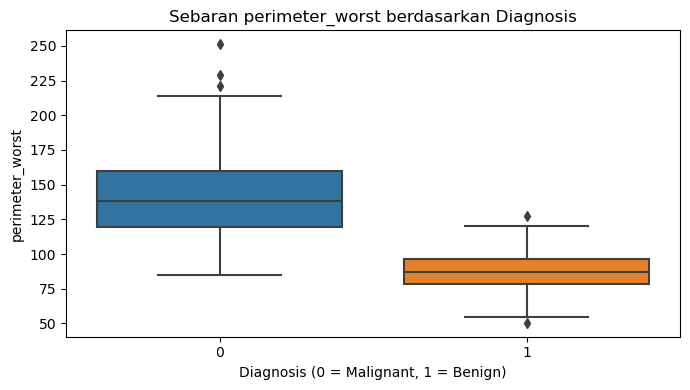

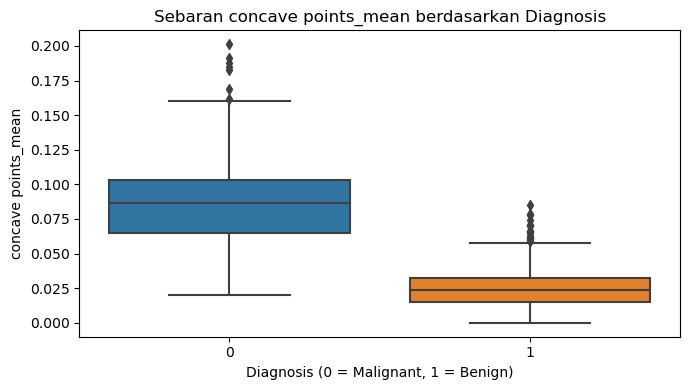

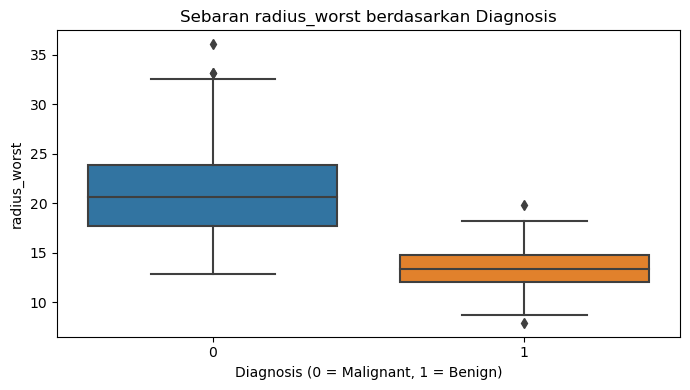

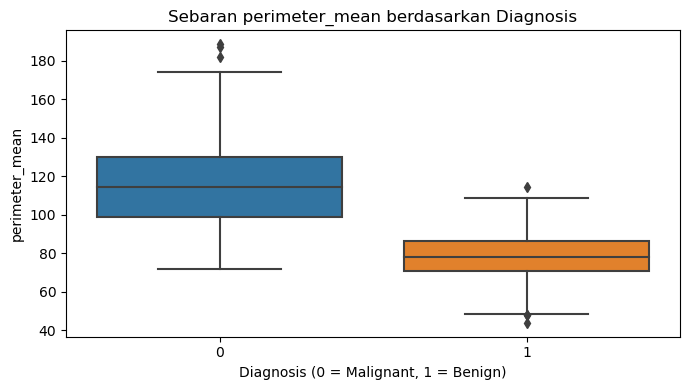

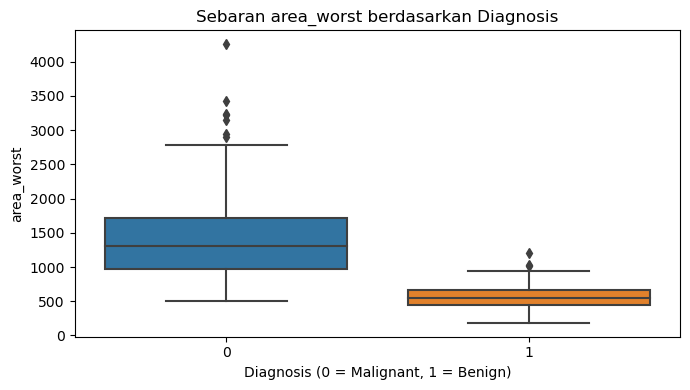

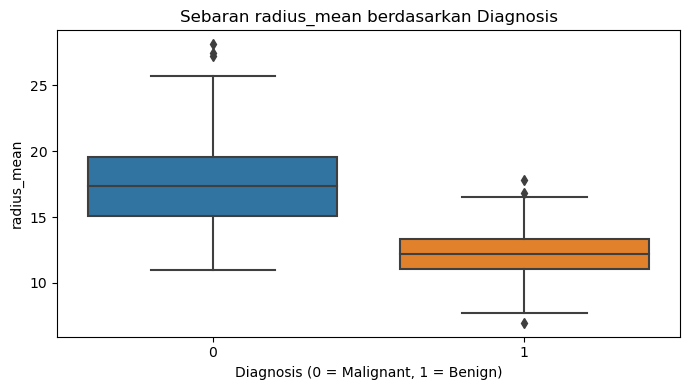

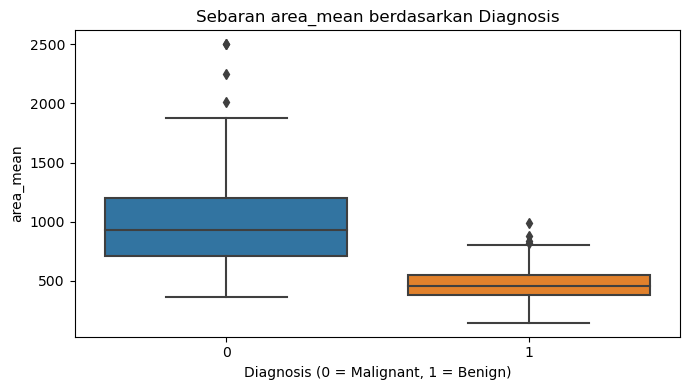

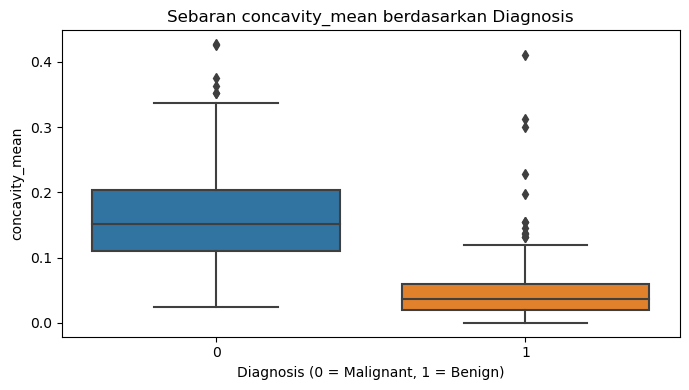

In [27]:
fitur_penting = ['concave points_worst', 'perimeter_worst', 'concave points_mean',
 'radius_worst', 'perimeter_mean', 'area_worst', 
 'radius_mean', 'area_mean', 'concavity_mean']

for fitur in fitur_penting:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='diagnosis', y=fitur, data=df)
    plt.title(f'Sebaran {fitur} berdasarkan Diagnosis')
    plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
    plt.ylabel(fitur)
    plt.tight_layout()
    plt.show()

## Feature Engineering

In [28]:
selected_features = [
    'concave points_worst',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean',
    'area_mean',
    'concavity_mean'
]

X = df[selected_features]
y = df['diagnosis']

Normalisasi

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling dan Evaluasi

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Simpan hasil evaluasi
results = {}

# Training & Evaluasi
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print()
    results[name] = acc

=== Logistic Regression ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


=== Random Forest ===
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


=== SVM ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                    

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


visualisasi confusion matrix

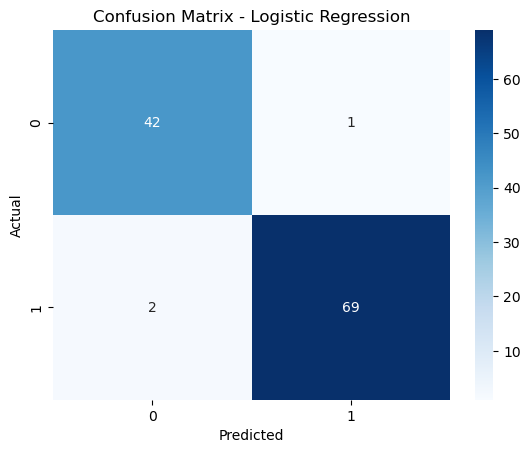

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Model terbaik: Logistic Regression
best_model = LogisticRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Precision-Recall Curve & ROC-AUC

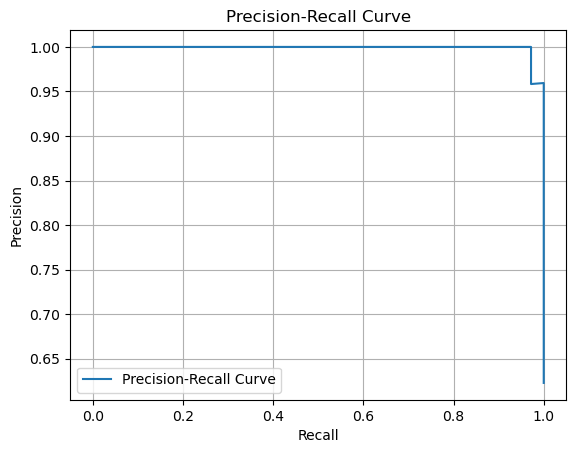

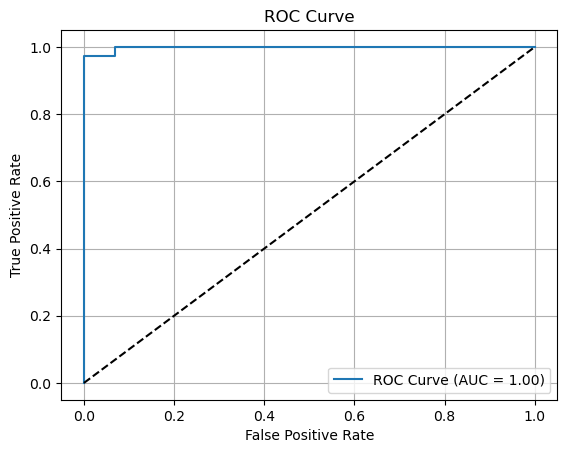

In [33]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Prediksi probabilitas (buat kurva)
y_scores = best_model.predict_proba(X_test_scaled)[:, 1]  # probabilitas kelas 1

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

Feature Importance (Logistic Regression)

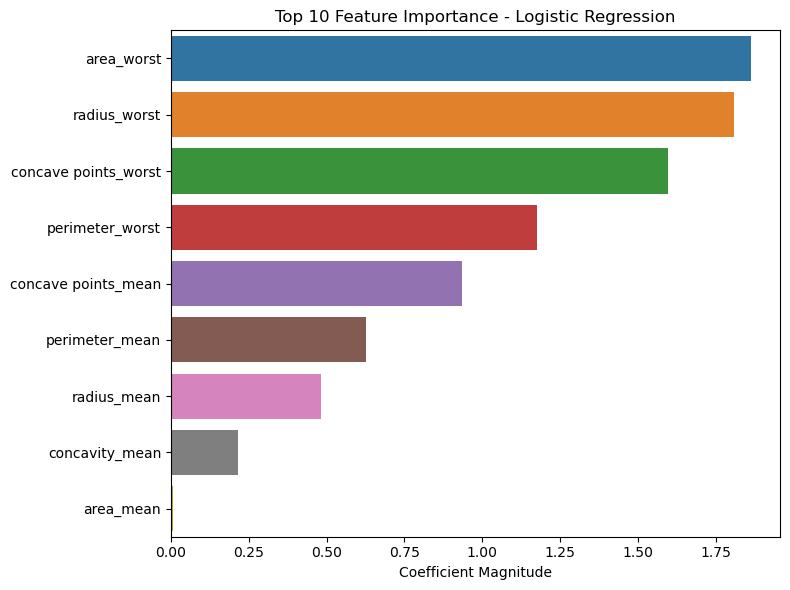

In [34]:
import pandas as pd
import numpy as np

# Ambil nama fitur dan koefisien
feature_importance = pd.Series(
    np.abs(best_model.coef_[0]), 
    index=X_train.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title('Top 10 Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

### Export model terbaik (Logistic Regression) ke file .pkl

In [35]:
import joblib

In [36]:
# Simpan model terbaik dan scaler ke file .pkl
joblib.dump(best_model, 'models/logreg_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']